# 1.0 Import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

# 2.0 Extraindo os dados

In [3]:
link = 'https://drive.google.com/file/d/1VP4_LoNVsT52XcVviBiVezFguRQpCPjZ/view?usp=share_link'

import pandas as pd 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('dados_teste.csv')   
  
df = pd.read_csv('dados_teste.csv') 

In [4]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


#### 2.1 Informação sobre os dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [6]:
df.describe() 

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [7]:
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

#### 2.2 Plotando e modificando as variáveis

In [8]:
# Declarando as variáveis

price = df['Price_in_thousands'].values.reshape(-1, 1)
sale =  df['Sales_in_thousands'].values.reshape(-1, 1)
resale = df['__year_resale_value'].values.reshape(-1, 1)
enginesize = df['Engine_size'].values.reshape(-1, 1)
horsepower = df['Horsepower'].values.reshape(-1, 1)
wheelbase = df['Wheelbase'].values.reshape(-1, 1)
width = df[['Width']].values.reshape(-1, 1)
length = df['Length'].values.reshape(-1, 1)
curbweight = df['Curb_weight'].values.reshape(-1, 1)
fuelcapacity = df['Fuel_capacity'].values.reshape(-1, 1)
fuelefficiency = df['Fuel_efficiency'].values.reshape(-1, 1)
power = df['Power_perf_factor'].values.reshape(-1, 1)


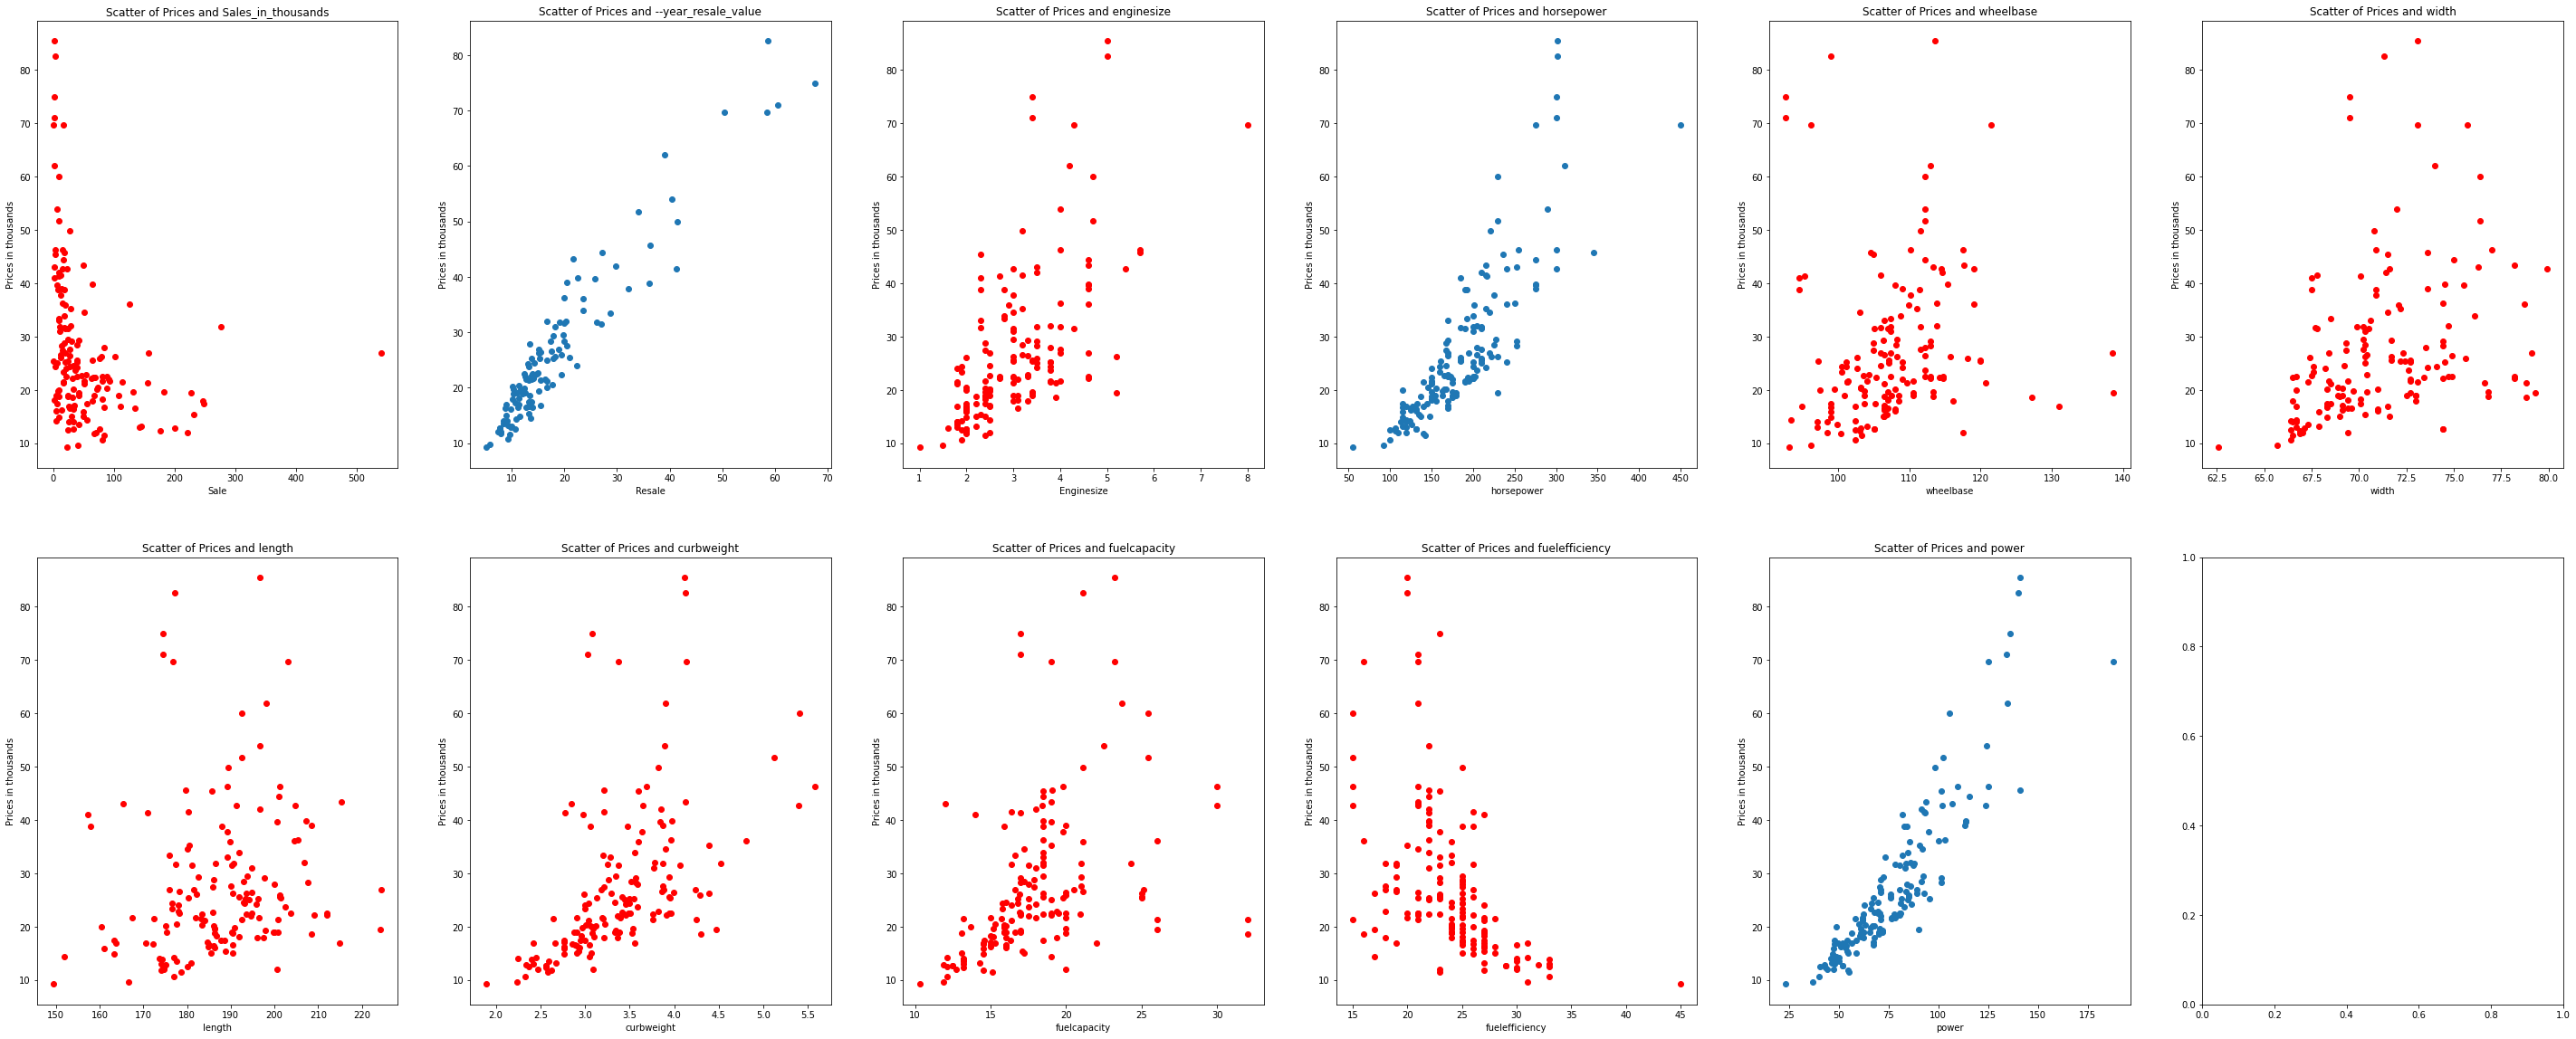

In [9]:
# Gráfico de dispersão entre variáveis ​​independentes e preços
fig, ((ax1, ax2, ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(ncols = 6, nrows = 2, figsize=(50, 20))
ax1.scatter(sale, price, color = 'r')
ax1.set(xlabel = 'Sale')
ax1.set(ylabel = 'Prices in thousands')
ax1.set(title = 'Scatter of Prices and Sales_in_thousands')

ax2.scatter(resale, price)
ax2.set(xlabel = 'Resale')
ax2.set(ylabel = 'Prices in thousands')
ax2.set(title = 'Scatter of Prices and --year_resale_value')

ax3.scatter(enginesize, price, color = 'r')
ax3.set(xlabel = 'Enginesize')
ax3.set(ylabel = 'Prices in thousands')
ax3.set(title = 'Scatter of Prices and enginesize')

ax4.scatter(horsepower, price)
ax4.set(xlabel = 'horsepower')
ax4.set(ylabel = 'Prices in thousands')
ax4.set(title = 'Scatter of Prices and horsepower')

ax5.scatter(wheelbase, price, color = 'r')
ax5.set(xlabel = 'wheelbase')
ax5.set(ylabel = 'Prices in thousands')
ax5.set(title = 'Scatter of Prices and wheelbase')

ax6.scatter(width, price, color = 'r')
ax6.set(xlabel = 'width')
ax6.set(ylabel = 'Prices in thousands')
ax6.set(title = 'Scatter of Prices and width')

ax7.scatter(length, price, color = 'r')
ax7.set(xlabel = 'length')
ax7.set(ylabel = 'Prices in thousands')
ax7.set(title = 'Scatter of Prices and length')

ax8.scatter(curbweight, price, color = 'r')
ax8.set(xlabel = 'curbweight')
ax8.set(ylabel = 'Prices in thousands')
ax8.set(title = 'Scatter of Prices and curbweight')

ax9.scatter(fuelcapacity, price, color = 'r')
ax9.set(xlabel = 'fuelcapacity')
ax9.set(ylabel = 'Prices in thousands')
ax9.set(title = 'Scatter of Prices and fuelcapacity')

ax10.scatter(fuelefficiency, price, color = 'r')
ax10.set(xlabel = 'fuelefficiency')
ax10.set(ylabel = 'Prices in thousands')
ax10.set(title = 'Scatter of Prices and fuelefficiency')

ax11.scatter(power, price)
ax11.set(xlabel = 'power')
ax11.set(ylabel = 'Prices in thousands')
ax11.set(title = 'Scatter of Prices and power')

plt.show()

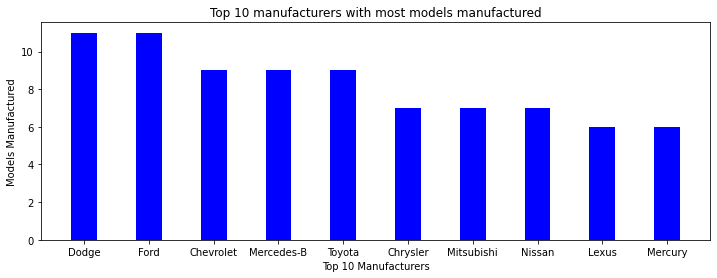

In [10]:
## Top 10 'Fabricantes' com a maioria dos 'Modelos' fabricados?

manufacturer_count = dict()
for each_manufacturer in list(df['Manufacturer']):
  if each_manufacturer not in manufacturer_count:
    manufacturer_count[each_manufacturer] = 1
  else:
    manufacturer_count[each_manufacturer] += 1
  
sorted_manufacturers = dict(sorted(manufacturer_count.items(), key= lambda item: item[1], reverse= True))

top_10_manufacturers = []
top_10_counts = []
for each_manufacturer in sorted_manufacturers:
   top_10_manufacturers.append(each_manufacturer)
   top_10_counts.append(sorted_manufacturers[each_manufacturer])
   if len(top_10_counts) == 10:
     break

fig = plt.figure(figsize=(12, 4))
plt.bar(top_10_manufacturers, top_10_counts, color = 'blue', width= 0.4)
plt.xlabel('Top 10 Manufacturers')
plt.ylabel('Models Manufactured')
plt.title('Top 10 manufacturers with most models manufactured')
plt.show()



Se observarmos o gráfico acima, veremos que entre os top 10 fabricantes os que mais se destacaram foram: Ford e Dodge.

In [11]:
average_sales = dict()
manufacturers = set(df['Manufacturer'])
for each_manufacturer in manufacturers:
    manufacturer_sales = list(df[df['Manufacturer'] == each_manufacturer]['Sales_in_thousands'])
    average_sales[each_manufacturer] = np.mean(manufacturer_sales)

sorted_manufacturers = dict(sorted(average_sales.items(), key = lambda item : item[1], reverse = True))

print('Staying: {}'.format(sorted_manufacturers))

Staying: {'Ford': 183.87590909090912, 'Honda': 118.53479999999999, 'Jeep': 97.71766666666667, 'Dodge': 82.74081818181818, 'Toyota': 82.245, 'Pontiac': 61.75566666666668, 'Chevrolet': 61.596111111111114, 'Buick': 60.50475, 'Nissan': 57.090714285714284, 'Hyundai': 45.77533333333333, 'Subaru': 40.067499999999995, 'Mercury': 39.666500000000006, 'Volkswagen': 34.86866666666666, 'Saturn': 33.769999999999996, 'Oldsmobile': 29.831499999999995, 'Chrysler': 28.817285714285713, 'Lincoln': 28.544666666666668, 'Mitsubishi': 25.842142857142854, 'Infiniti': 23.713, 'Cadillac': 22.4356, 'Acura': 19.75125, 'Lexus': 17.807166666666664, 'Plymouth': 16.00025, 'BMW': 15.501666666666667, 'Jaguar': 15.467, 'Audi': 13.519, 'Mercedes-B': 13.01388888888889, 'Volvo': 12.623333333333335, 'Saab': 10.653, 'Porsche': 4.042666666666666}


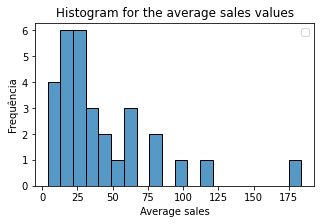

In [12]:
# Histograma para os valores médios de vendas
ax = sns.histplot(list(sorted_manufacturers.values()), bins = 20)
ax.figure.set_size_inches(5, 3)
plt.title('Histogram for the average sales values')         
plt.ylabel('Frequência')                     
plt.xlabel('Average sales')          
plt.legend() 

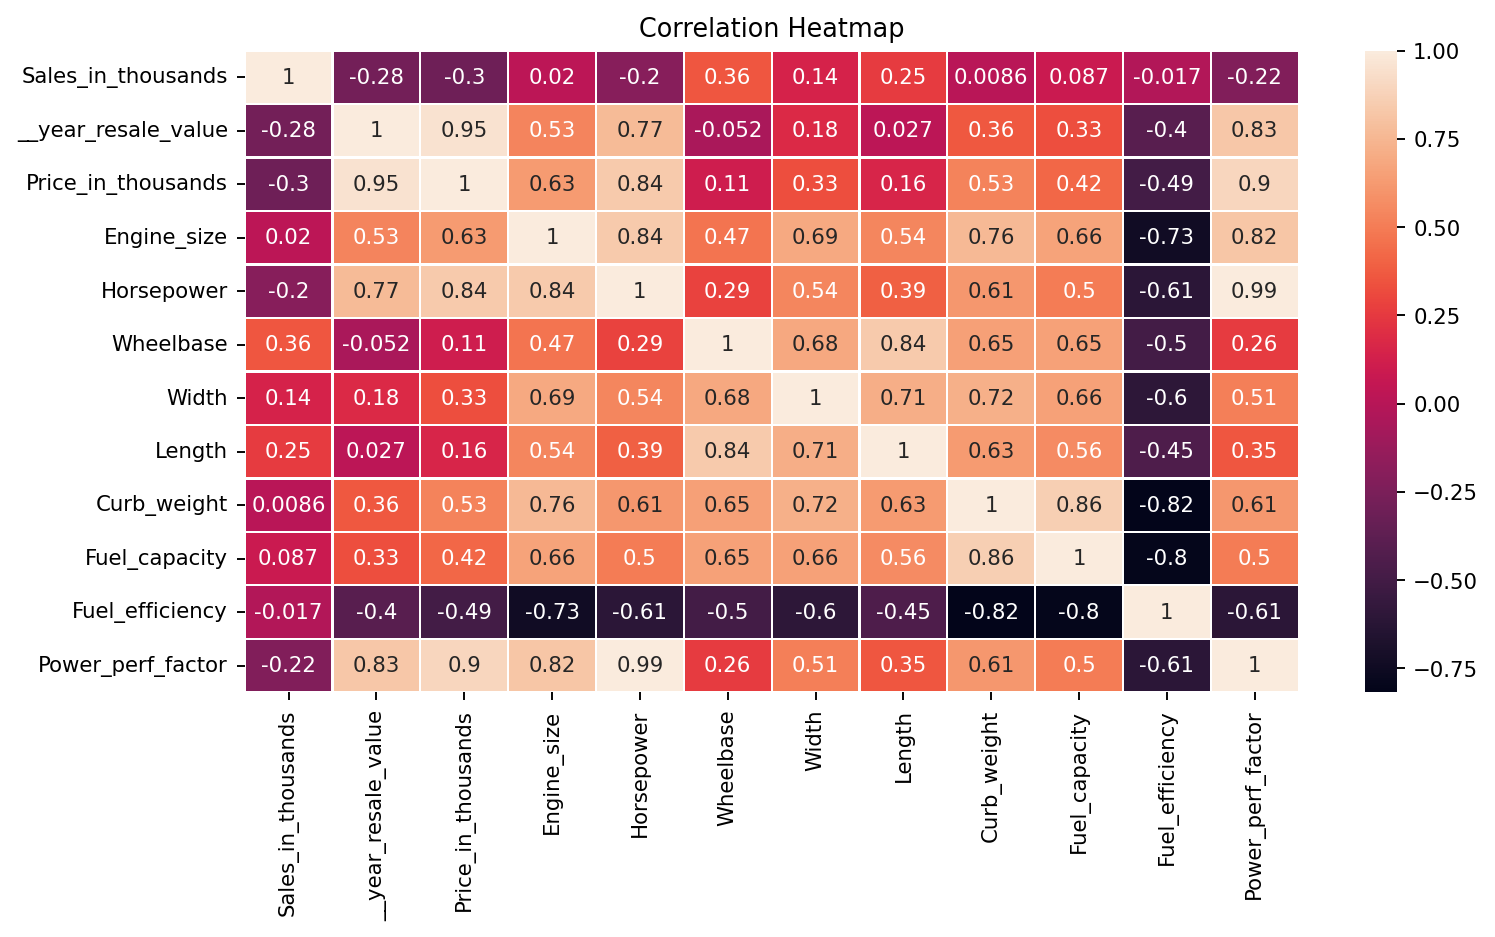

In [13]:
plt.rcParams['font.size'] = 9
plt.rcParams['figure.dpi'] = 170
plt.rcParams['figure.figsize'] = (10,5)
heatmap = sns.heatmap(df.corr(), annot=True, linewidths= .5)
heatmap.set_title('Correlation Heatmap')
plt.show()


# 3.0 Pré - Processamento Dos Dados

In [14]:
# Pacotes de pré-processamento de dados 
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
## Drop nas Colunas - Model e Lastest launch
alterando_dataset = df.drop(['Model', 'Latest_Launch'], axis=1)
alterando_dataset

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,Acura,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,Volvo,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,Volvo,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,Volvo,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [16]:
# Verificando se na coluna Price in Thousands existe Na:
alterando_dataset['Price_in_thousands'].isna().sum()


2

In [17]:
# Dropar todas as linhas que tem NaNs na coluna Price in Thousands

novo_dataset = alterando_dataset[alterando_dataset['Price_in_thousands'].notna()]
novo_dataset.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105


In [18]:
## Substituir NaNs das colunas __year_resale_value, Fuel_efficiency, Power_perf_factor com a mediana

novo_dataset['__year_resale_value'].fillna(value = novo_dataset['__year_resale_value'].median(), inplace=True)
novo_dataset['Fuel_efficiency'].fillna(value = novo_dataset['Fuel_efficiency'].median(), inplace=True)
novo_dataset['Power_perf_factor'].fillna(value = novo_dataset['__year_resale_value'].median(), inplace=True)

## Substituir NaNs das colunas Curb_Weight with  mean
novo_dataset['Curb_weight'].fillna(value = novo_dataset['Curb_weight'].mean(), inplace=True)

novo_dataset.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105


In [19]:
novo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 156
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         155 non-null    object 
 1   Sales_in_thousands   155 non-null    float64
 2   __year_resale_value  155 non-null    float64
 3   Vehicle_type         155 non-null    object 
 4   Price_in_thousands   155 non-null    float64
 5   Engine_size          155 non-null    float64
 6   Horsepower           155 non-null    float64
 7   Wheelbase            155 non-null    float64
 8   Width                155 non-null    float64
 9   Length               155 non-null    float64
 10  Curb_weight          155 non-null    float64
 11  Fuel_capacity        155 non-null    float64
 12  Fuel_efficiency      155 non-null    float64
 13  Power_perf_factor    155 non-null    float64
dtypes: float64(12), object(2)
memory usage: 18.2+ KB


In [20]:
## DETECTANDO MULTICOLINEARIDADE COM VIF (Variance Inflation Factor)

# Removendo os dados categoricos para calculcar o VIF
amostra_dados = novo_dataset.drop(['Sales_in_thousands', 'Manufacturer', 'Vehicle_type'], axis=1)
coluna_nomes = list(amostra_dados.columns)

for nome in coluna_nomes:
  if len(coluna_nomes) >= 2:
    Y = amostra_dados.loc[:, amostra_dados.columns == nome]
    X = amostra_dados.loc[:, amostra_dados.columns != nome]
    modelo_linear = sm.OLS(Y, X)
    resultados =  modelo_linear.fit()
    r_squared = resultados.rsquared
    vif_valor = round(1/(1 - r_squared), 2)
    print('Coluna: {} and VIF: {}'.format(nome, vif_valor))
    if vif_valor > 10:
      amostra_dados = amostra_dados.drop([nome], axis=1)
      coluna_nomes.remove(nome)


"""## Se nortamos abaixo, as colunas: 
__year_resale_value, Engine_size, Wheelbase, Length, Fuel_capacity e Power_perf_factor 
estão causando no conjunto dos dados a multi_colinearidade, portanto vamos retirar estas colunas do conjunto de dados."""

Coluna: __year_resale_value and VIF: 13.19
Coluna: Engine_size and VIF: 9007199254740992.0
Coluna: Wheelbase and VIF: 885.49
Coluna: Length and VIF: 495.93
Coluna: Fuel_capacity and VIF: 101.84
Coluna: Power_perf_factor and VIF: 515276.15


In [21]:
# Dropando as colunas que estão causando mult-colinearidade
dataset_final = novo_dataset.drop(['__year_resale_value', 'Engine_size', 'Wheelbase', 'Length', 'Fuel_capacity', 'Power_perf_factor'], axis=1)
dataset_final.head()

,Manufacturer,Sales_in_thousands,Vehicle_type,Price_in_thousands,Horsepower,Width,Curb_weight,Fuel_efficiency
0,Acura,16.919,Passenger,21.50,140.0,67.3,2.639,28.0
1,Acura,39.384,Passenger,28.40,225.0,70.3,3.517,25.0
3,Acura,8.588,Passenger,42.00,210.0,71.4,3.850,22.0
4,Audi,20.397,Passenger,23.99,150.0,68.2,2.998,27.0
5,Audi,18.780,Passenger,33.95,200.0,76.1,3.561,22.0


In [22]:
# Codificando a variavel categorica - Manufacturer
""" Se a média de vendas do fabricante for menor que 72, 
será chamado de classe 1, se for maior que 72, será chamado de classe 2
""" 
manufacturers = []
for each_manufacturer in dataset_final['Manufacturer']:
  if sorted_manufacturers[each_manufacturer] > 72:
    manufacturers.append(2)
  else:
    manufacturers.append(1)
dataset_final['Manufacturer'] = manufacturers
dataset_final.head()

,Manufacturer,Sales_in_thousands,Vehicle_type,Price_in_thousands,Horsepower,Width,Curb_weight,Fuel_efficiency
0,1,16.919,Passenger,21.50,140.0,67.3,2.639,28.0
1,1,39.384,Passenger,28.40,225.0,70.3,3.517,25.0
3,1,8.588,Passenger,42.00,210.0,71.4,3.850,22.0
4,1,20.397,Passenger,23.99,150.0,68.2,2.998,27.0
5,1,18.780,Passenger,33.95,200.0,76.1,3.561,22.0


### 3.1 Dividindo o dataset em variáveis dependente e independentes.

In [23]:
X = dataset_final.iloc[:, [0, 1, 2, 4, 5, 6, 7]].values
Y = dataset_final.iloc[:, 3:4].values

In [24]:
print(X[0])

[1 16.919 'Passenger' 140.0 67.3 2.639 28.0]


In [25]:
print(Y[:5])

[[21.5 ]
 [28.4 ]
 [42.  ]
 [23.99]
 [33.95]]


### 3.2 Codificação da variável categórica - Tipo de veículo usando OneHotEncoding

In [26]:
columnTransformer = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [2])], remainder = 'passthrough')
X = np.array(columnTransformer.fit_transform(X))
print(X[0])

[0.0 1.0 1 16.919 140.0 67.3 2.639 28.0]


### 3.3 Dividir os dados de teste e treino

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### 3.4 Dimensionar os dados usando o StandardScaler

In [29]:
standardScaler = StandardScaler()
X_train[:, 3:] = standardScaler.fit_transform(X_train[:, 3:])
X_test[:, 3:] = standardScaler.transform(X_test[:, 3:])


In [30]:
print(X_train[0])

[0.0 1.0 1 -0.5971544980976075 0.4855529689932659 -0.9682209785808613
 -0.30414594743793366 0.5376925814044157]


In [31]:
print(X_test[0])

[0.0 1.0 1 -0.754444977827755 -0.44099666918824076 0.33492495389324445
 -0.4342962026825829 -0.607906732928016]


# 4.0 Construção dos Modelos

In [32]:
# Importando as Biblíotecas
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### 4.1 Aplicando o Modelo de Regressão Linear

In [62]:
## Treinando o modelo
rl = LinearRegression().fit(X_train, Y_train)

In [63]:
## prevendo os resultados
Y_pred = rl.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), axis = 1))


[[20.76 25.45]
 [37.93 51.73]
 [40.11 28.34]
 [28.75 22.25]
 [28.88 25.31]
 [ 9.09  9.7 ]
 [56.31 82.6 ]
 [13.94 17.5 ]
 [39.92 45.5 ]
 [34.1  31.5 ]
 [37.86 26.31]
 [15.7  11.53]
 [21.53 19.05]
 [30.97 43.33]
 [45.04 39.66]
 [24.19 16.54]
 [15.32 16.48]
 [31.55 31.75]
 [24.46 19.72]
 [16.4  16.88]
 [12.43 13.26]
 [30.8  27.89]
 [24.11 21.98]
 [15.03 13.96]
 [38.4  37.8 ]
 [18.31 15.01]
 [30.48 41.  ]
 [24.48 21.56]
 [19.5  19.04]
 [15.34 16.24]
 [30.11 26.1 ]]


#### 4.1.0 Calculando o valor do R-squared do modelo

In [35]:
## Calculando o R-Squared
r2_rl = r2_score(Y_test, Y_pred)
r2_rl

0.7401526627598903

### 4.2 Aplicação de regressão vectorial

In [36]:
# Treinando o modelo
vector_regr = SVR(kernel = 'rbf')
vector_regr.fit(X_train, Y_train)

SVR()

In [37]:
### prevendo os resultados

Y_pred = vector_regr.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), axis = 1))

[[24.22 25.45]
 [27.08 51.73]
 [31.43 28.34]
 [25.05 22.25]
 [26.03 25.31]
 [15.16  9.7 ]
 [34.52 82.6 ]
 [18.1  17.5 ]
 [31.96 45.5 ]
 [28.73 31.5 ]
 [27.13 26.31]
 [17.92 11.53]
 [20.87 19.05]
 [26.89 43.33]
 [32.54 39.66]
 [19.62 16.54]
 [17.84 16.48]
 [24.76 31.75]
 [20.02 19.72]
 [15.46 16.88]
 [15.59 13.26]
 [25.19 27.89]
 [21.82 21.98]
 [15.42 13.96]
 [31.22 37.8 ]
 [17.46 15.01]
 [23.27 41.  ]
 [20.88 21.56]
 [21.35 19.04]
 [17.26 16.24]
 [25.06 26.1 ]]


#### 4.2.0 Calculando o valor do R-squared do modelo

In [38]:
## Calculando o R-Squared
r2_vector_regr = r2_score(Y_test, Y_pred)
r2_vector_regr

0.40370238764441324

### 4.3 Aplicando a arvore de decisão

In [65]:
## Treinando o modelo

decis_tree_regressor = DecisionTreeRegressor(random_state = 0)
decis_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [66]:
## prevendo os resultados
Y_pred = decis_tree_regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), axis = 1))


[[18.14 25.45]
 [60.1  51.73]
 [42.8  28.34]
 [23.75 22.25]
 [36.   25.31]
 [13.99  9.7 ]
 [46.3  82.6 ]
 [14.9  17.5 ]
 [43.   45.5 ]
 [27.56 31.5 ]
 [19.46 26.31]
 [12.64 11.53]
 [20.39 19.05]
 [25.3  43.33]
 [39.08 39.66]
 [17.04 16.54]
 [15.35 16.48]
 [33.4  31.75]
 [18.27 19.72]
 [12.64 16.88]
 [15.9  13.26]
 [22.61 27.89]
 [19.39 21.98]
 [12.64 13.96]
 [42.8  37.8 ]
 [16.54 15.01]
 [38.9  41.  ]
 [22.5  21.56]
 [18.85 19.04]
 [14.9  16.24]
 [31.6  26.1 ]]


#### 4.3.0 Calculando o valor do R-squared do modelo

In [67]:
## Calculando o R-squared
r2_dtree_regressor = r2_score(Y_test, Y_pred)
r2_dtree_regressor

0.6516960439893903

## 4.4 Aplicação de Regressão Florestal Aleatória no conjunto de dados

In [81]:
## Treinando o modelo
rand_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0 )
rand_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [82]:
## prevendo os resultados
Y_pred = rand_forest_regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), axis = 1))

[[26.22 25.45]
 [45.77 51.73]
 [40.36 28.34]
 [25.41 22.25]
 [29.27 25.31]
 [11.41  9.7 ]
 [62.69 82.6 ]
 [16.98 17.5 ]
 [38.03 45.5 ]
 [31.2  31.5 ]
 [28.77 26.31]
 [13.87 11.53]
 [19.4  19.05]
 [27.25 43.33]
 [42.81 39.66]
 [21.44 16.54]
 [15.77 16.48]
 [32.77 31.75]
 [21.18 19.72]
 [14.49 16.88]
 [14.92 13.26]
 [22.61 27.89]
 [19.27 21.98]
 [12.74 13.96]
 [40.04 37.8 ]
 [17.03 15.01]
 [29.41 41.  ]
 [21.97 21.56]
 [19.01 19.04]
 [17.09 16.24]
 [32.25 26.1 ]]


#### 4.4.0 Calculando o valor do R-squared do modelo

In [83]:
## Calculando o R-squared
r2_random_forest_regression = r2_score(Y_test, Y_pred)
r2_random_forest_regression

0.8204071370060241

# 5.0 Conclusão

In [87]:
### Tabulação do desempenho de vários modelos de Regressão

from tabulate import tabulate

table = []
table.append(['Ordem', 'Modelo de Regressão', 'Valor do R-squared'])
table.append(['1', 'Regressão Linear', r2_rl])
table.append(['2', 'Regressão vectorial', r2_vector_regr])
table.append(['3', 'Árvore de Decisão', r2_dtree_regressor])
table.append(['4', 'Regressão de Floresta Aleatórias ', r2_random_forest_regression])


print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤══════════════════════════════════╤══════════════════════╕
│   Ordem │ Modelo de Regressão              │   Valor do R-squared │
╞═════════╪══════════════════════════════════╪══════════════════════╡
│       1 │ Regressão Linear                 │             0.740153 │
├─────────┼──────────────────────────────────┼──────────────────────┤
│       2 │ Regressão vectorial              │             0.403702 │
├─────────┼──────────────────────────────────┼──────────────────────┤
│       3 │ Árvore de Decisão                │             0.651696 │
├─────────┼──────────────────────────────────┼──────────────────────┤
│       4 │ Regressão de Floresta Aleatórias │             0.820407 │
╘═════════╧══════════════════════════════════╧══════════════════════╛


Concluimos que ao treinarmos e aplicarmos os modelos de regressão, o modelo **Random Forest Regression** foi o que conseguiu ser mais preciso entre os outros modelos.